## Load Libraries

In [1]:
import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing 
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix 
import warnings                       # Hide warning messages
warnings.filterwarnings("ignore")
%matplotlib inline     

## Load Data

In [2]:
# Reading the file 
df = pd.read_csv(r"C:\Users\Vivek 6666\Downloads\advertising.csv") 

## Examine the data

In [3]:
df.head(10) # Checking the 1st 10 rows of the data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


## Extracting Datetime Variables

- Utilizing ```timestamp``` feature to better understand the pattern when a user is clicking on a ad.

In [4]:
# Extract datetime variables using timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 
# Converting timestamp column into datatime object in order to extract new features
df['Month'] = df['Timestamp'].dt.month 
# Creates a new column called Month
df['Day'] = df['Timestamp'].dt.day     
# Creates a new column called Day
df['Hour'] = df['Timestamp'].dt.hour   
# Creates a new column called Hour
df["Weekday"] = df['Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
df = df.drop(['Timestamp'], axis=1) # deleting timestamp

In [5]:
df.head() # verifying if the variables are added to our main data frame

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


## Basic model building based on the actual data

In [6]:
# Importing train_test_split from sklearn.model_selection family
from sklearn.model_selection import train_test_split

In [7]:
# Assigning Numerical columns to X & y only as model can only take numbers
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [8]:
# Splitting the data into train & test sets 
# test_size is % of data that we want to allocate & random_state ensures a specific set of random splits on our data because 
#this train test split is going to occur randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# We dont have to use stratify method in train_tst_split to handle class distribution as its not imbalanced and does contain equal number of classes i.e 1's and 0's
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 5) (700,)
(300, 5) (300,)


## Building a Basic Model

In [9]:
# Import LogisticRegression from sklearn.linear_model family
from sklearn.linear_model import LogisticRegression

In [10]:
# Instantiate an instance of the linear regression model (Creating a linear regression object)
logreg = LogisticRegression()
# Fit the model on training data using a fit method
model = logreg.fit(X_train,y_train)
model

LogisticRegression()

## Predictions

In [11]:
# The predict method just takes X_test as a parameter, which means it just takes the features to draw predictions
predictions = logreg.predict(X_test)
# Below are the results of predicted click on Ads
predictions[0:20]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

## Performance Metrics

- Now, we need to see how far our predictions met the actual test data **(y_test)** by performing evaluations using classification report & confusion matrix on the target variable and the projections.


- **confusion matrix** is used to evaluate the model behaviour from a matrix.


- **TP** - True Positive **TN** - True Negative **FP** - False Positive **FN** - False Negative.

- True Positive is the proportion of positives that are correctly identified.
- Similarly, True Negative is the proportion of negatives that are correctly identified. 
- False Positive is the condition where we predict a result that it doesn't fulfil. 
- Similarly, False Negative is the condition where the prediction failed when it was successful.


- If we want to calculate any specific value, we can do it from the confusion matrix directly.


- **classification_report** will tell us the precision, recall value's accuracy, f1 score & support. This way, we don't have to read it ourselves from a confusion matrix.


- **precision** is the fraction of retrieved values that are relevant to the data. The precision is the ratio of tp / (tp + FP).


- **recall** is the fraction of successfully retrieved values that are relevant to the data. The recall is the ratio of tp / (tp + fn).


- **f1-score** is the harmonic mean of precision and recall where a score reaches its best value at one and worst score at 0.


- **support** is the number of occurrences of each class in y_test.

In [12]:
# Importing classification_report from sklearn.metrics family
from sklearn.metrics import classification_report

# Printing classification_report to see the results
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [13]:
# Importing a pure confusion matrix from sklearn.metrics family
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[140   6]
 [ 25 129]]


## Results for Basic Model

- The results from the evaluation are as follows:

**Confusion Matrix:**

- The users that are predicted to click on commercials and the clicked users were **140**, the people who were expected not to click on the commercials and did not click on them were **129**.

- The people who were predicted to click on commercials and did not click on them are **6**, and the users who were not expected to click on the commercials and clicked on them are **25**.

- We have only a few mislabelled points that are not wrong from the given size of the dataset.

**Classification Report:**

- From the report obtained, the precision & recall are **0.90**, which depicts the predicted values are **90%** accurate. 
The probability that the user can click on the commercial is **0.90**, which is a good precision value to get a good model.

## Feature Engineering

In [14]:
new_df = df.copy() # just to keep the original dataframe unchanged

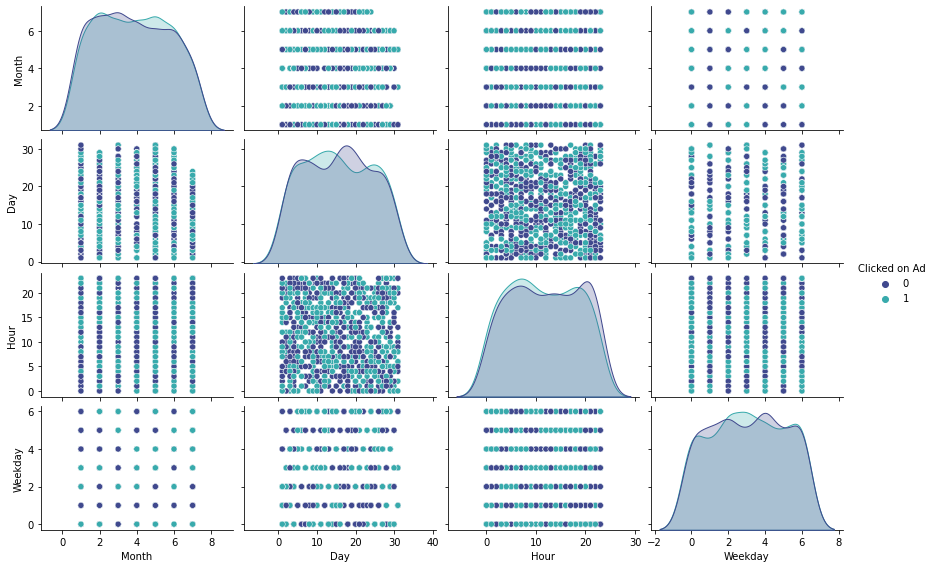

In [15]:
# Creating pairplot to check effect of datetime variables on target variable (variables which were created)
pp = sns.pairplot(new_df, hue= 'Clicked on Ad', vars = ['Month', 'Day', 'Hour', 'Weekday'], palette = 'mako',height = 2,aspect=1.5)

#### There don't seem to be any effect of the month, day, weekday and hour on the target variable.

In [16]:
# Dummy encoding on Month column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Month'], prefix='Month')], axis=1) 
# Dummy encoding on weekday column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Weekday'], prefix='Weekday')], axis=1)

In [17]:
# Creating buckets for hour columns based on EDA part
new_df['Hour_bins'] = pd.cut(new_df['Hour'], bins = [0, 5, 11, 17, 23], 
                        labels = ['Hour_0-5', 'Hour_6-11', 'Hour_12-17', 'Hour_18-23'], include_lowest= True)

In [18]:
# Dummy encoding on Hour_bins column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Hour_bins'], prefix='Hour')], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '19'),
  Text(1, 0, '20'),
  Text(2, 0, '21'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '24'),
  Text(6, 0, '25'),
  Text(7, 0, '26'),
  Text(8, 0, '27'),
  Text(9, 0, '28'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '31'),
  Text(13, 0, '32'),
  Text(14, 0, '33'),
  Text(15, 0, '34'),
  Text(16, 0, '35'),
  Text(17, 0, '36'),
  Text(18, 0, '37'),
  Text(19, 0, '38'),
  Text(20, 0, '39'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '42'),
  Text(24, 0, '43'),
  Text(25, 0, '44'),
  Text(26, 0, '45'),
  Text(27, 0, '46'),
  Text(28, 0, '47'),
  Text(29, 0, '48'),
  Text(30, 0, '49'),
  Text(31, 0, '50'),
  Text(32, 0, '51'),
  Text(33, 0, '52'),
  Text(34, 0, '53'),
  Text(35, 0, '54'),
  Text(36, 0, '55'),
  Text(37, 0, '56'),
  Text(38, 0, 

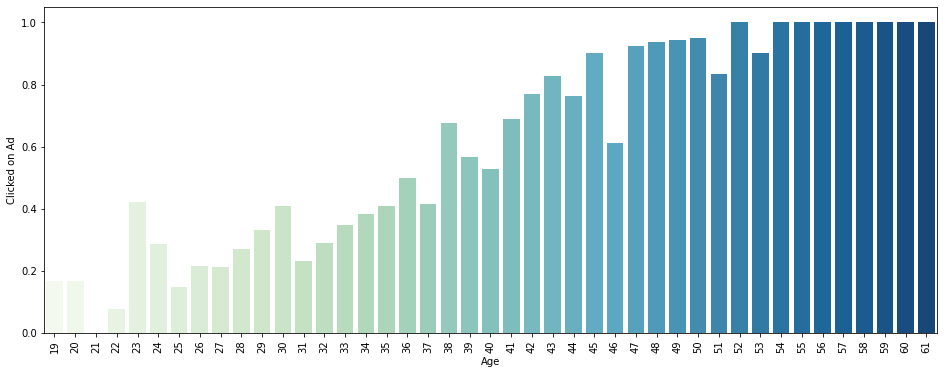

In [19]:
# Feature engineering on Age column
plt.figure(figsize=(16,6))
sns.barplot(new_df['Age'],df['Clicked on Ad'], ci=None,palette = 'GnBu')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '19'),
  Text(1, 0, '20'),
  Text(2, 0, '21'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '24'),
  Text(6, 0, '25'),
  Text(7, 0, '26'),
  Text(8, 0, '27'),
  Text(9, 0, '28'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '31'),
  Text(13, 0, '32'),
  Text(14, 0, '33'),
  Text(15, 0, '34'),
  Text(16, 0, '35'),
  Text(17, 0, '36'),
  Text(18, 0, '37'),
  Text(19, 0, '38'),
  Text(20, 0, '39'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '42'),
  Text(24, 0, '43'),
  Text(25, 0, '44'),
  Text(26, 0, '45'),
  Text(27, 0, '46'),
  Text(28, 0, '47'),
  Text(29, 0, '48'),
  Text(30, 0, '49'),
  Text(31, 0, '50'),
  Text(32, 0, '51'),
  Text(33, 0, '52'),
  Text(34, 0, '53'),
  Text(35, 0, '54'),
  Text(36, 0, '55'),
  Text(37, 0, '56'),
  Text(38, 0, 

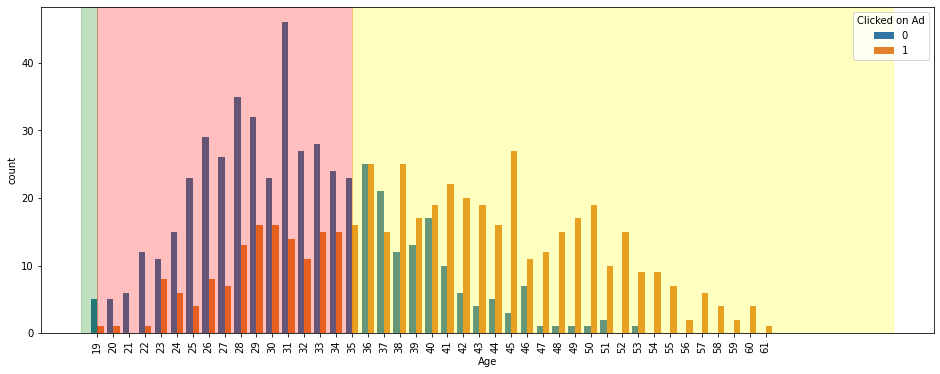

In [20]:
# checking bins
limit_1 = 18
limit_2 = 35

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(16,6))
#sns.barplot(df['age'],df['survival_7_years'], ci=None)
sns.countplot('Age',hue='Clicked on Ad',data=df)
plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 50, alpha=0.25, color='yellow')

plt.xticks(rotation=90)

In [21]:
# Creating Bins on Age column based on above plots
new_df['Age_bins'] = pd.cut(new_df['Age'], bins=[0, 18, 30, 45, 70], labels=['Young','Adult','Mid', 'Elder'])

<AxesSubplot:xlabel='Age_bins', ylabel='count'>

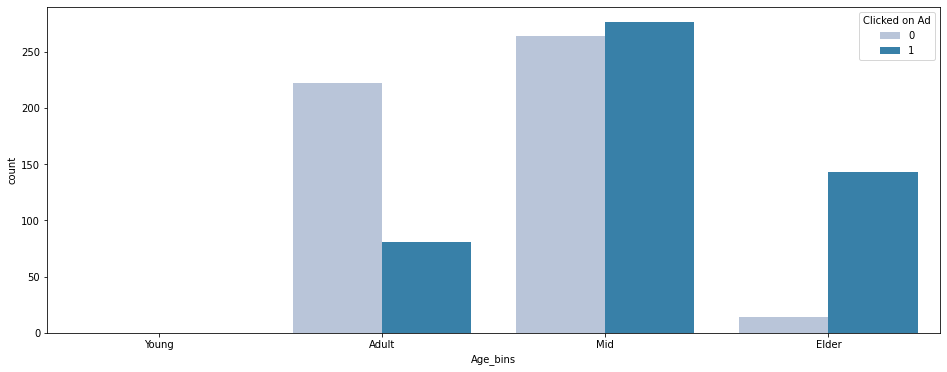

In [22]:
plt.figure(figsize=(16,6))
sns.countplot('Age_bins',hue='Clicked on Ad',data= new_df,palette = 'PuBu') # Verifying the bins by checking the count

In [23]:
# Dummy encoding on Age column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Age_bins'], prefix='Age')], axis=1) 

In [24]:
# Dummy encoding on Column column based on EDA
new_df = pd.concat([new_df, pd.get_dummies(new_df['Country'], prefix='Country')], axis=1)

In [25]:
# Remove redundant and no predictive power features
new_df.drop(['Country', 'Ad Topic Line', 'City', 'Day', 'Month', 'Weekday', 
             'Hour', 'Hour_bins', 'Age', 'Age_bins'], axis = 1, inplace = True)
new_df.head() # Checking the final dataframe

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month_1,Month_2,Month_3,Month_4,Month_5,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,61833.90,256.09,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,68441.85,193.77,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,59785.94,236.50,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,54806.18,245.89,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,73889.99,225.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building Logistic Regression Model

In [26]:
X = new_df.drop(['Clicked on Ad'],1)
y = new_df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
# Standarizing the features
from  sklearn.preprocessing  import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 263) (800,)
(200, 263) (200,)


In [28]:
import  statsmodels.api  as sm
from scipy import stats

X2   = sm.add_constant(X_train_std)
est  = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Clicked on Ad   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     17.75
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          8.68e-164
Time:                        10:47:32   Log-Likelihood:                 314.62
No. Observations:                 800   AIC:                            -115.2
Df Residuals:                     543   BIC:                             1089.
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4863      0.007     69.390      0.0

- We can see that the feature **Male(Gender)** does not contribute to the model (i.e., see x4), so we can remove that variable from our model. After removing the variable if the Adjusted R-squared has not changed from the previous model. Then we could conclude that the feature indeed was not contributing to the model. Looks like the contributing features for the model are:

 - Daily Time Spent on site
 - Daily Internet Usage
 - Age
 - Country
 - Area income

In [29]:
# Applying logistic regression model to training data
lr = LogisticRegression(penalty="l2", C= 0.1, random_state=42)
lr.fit(X_train_std, y_train)
# Predict using model
lr_training_pred = lr.predict(X_train_std)
lr_training_prediction = accuracy_score(y_train, lr_training_pred)

print( "Accuracy of Logistic regression training set:",   round(lr_training_prediction,3))

Accuracy of Logistic regression training set: 0.992


In [30]:
#Creating K fold Cross-validation 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lr, # model
                         X_train_std, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.956 +/- 0.022


The cross validated score for Logistic Regression Classifier is: 95.62


Text(0.5, 1.05, 'Confusion_matrix')

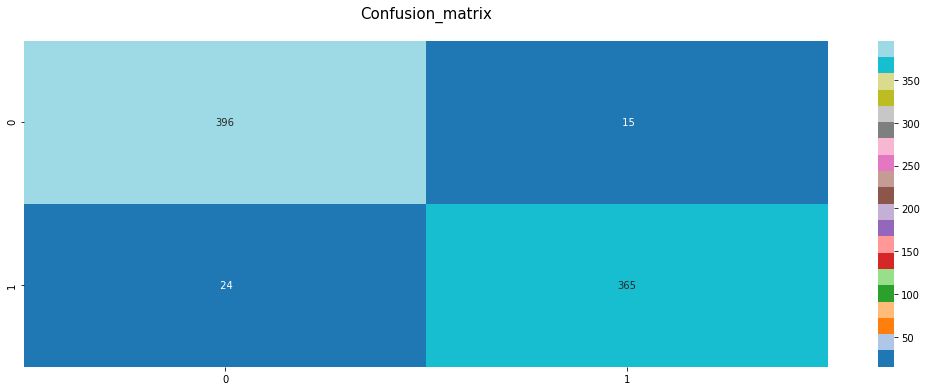

In [31]:
from sklearn.model_selection import cross_val_predict
fig = plt.figure(figsize = (18,6))
print('The cross validated score for Logistic Regression Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(lr,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="tab20")
plt.title('Confusion_matrix', y=1.05, size=15)

## Modelling with Random Forests

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(criterion='gini', n_estimators=400,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=42,n_jobs=-1)
rf.fit(X_train_std,y_train)
# Predict using model
rf_training_pred = rf.predict(X_train_std)
rf_training_prediction = accuracy_score(y_train, rf_training_pred)
x`
print("Accuracy of Random Forest training set:",   round(rf_training_prediction,3))

Accuracy of Random Forest training set: 0.994


In [39]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, # model
                         X_train_std, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.966 +/- 0.013


The cross validated score for Random Forest Classifier is: 96.62


Text(0.5, 1.05, 'Confusion_matrix')

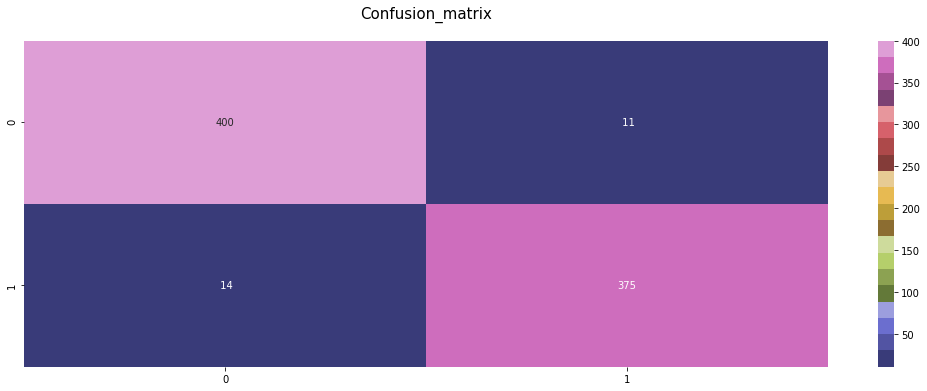

In [40]:
from sklearn.model_selection import cross_val_predict
fig = plt.figure(figsize = (18,6))
print('The cross validated score for Random Forest Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(rf,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="tab20b")
plt.title('Confusion_matrix', y=1.05, size=15)

## Random Forest Feature Importances

In [41]:
columns = X.columns
train = pd.DataFrame(np.atleast_2d(X_train_std), columns=columns) # Converting numpy array list into dataframes

In [42]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head(10)

,index,importance
0,Daily Internet Usage,0.363155
1,Daily Time Spent on Site,0.283201
2,Area Income,0.113893
3,Age_Elder,0.039546
4,Age_Adult,0.028179
5,Age_Mid,0.008104
6,Country_Hungary,0.003655
7,Male,0.003080
8,Hour_Hour_6-11,0.003060
9,Country_Australia,0.002839


<AxesSubplot:xlabel='importance', ylabel='index'>

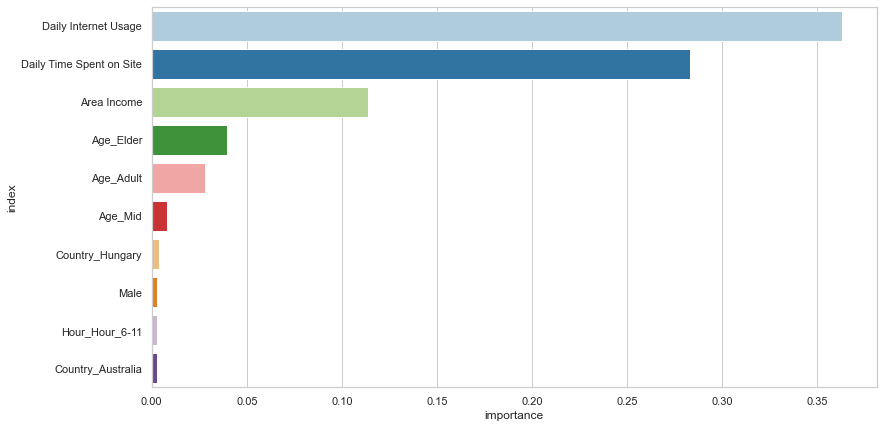

In [43]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances[0:10],label="Total", color="b",palette='Paired')

## Test Models Performance

In [44]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test_std))

print ("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test, lr.predict(X_test_std)))

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test_std))

print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test_std)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.91
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        89
           1       0.97      0.86      0.91       111

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



 ---Random Forest Model---
Random Forest AUC = 0.94
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        89
           1       0.94      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



#### We can observe that random forest has higher accuracy compared to logistic regression model in both test and train data sets.

#### Fit the model on the entire data and save the predictions on csv file

In [46]:
final_predictions = lr.predict(X)

In [47]:
predic = pd.DataFrame({'Predict_Click on Ad': final_predictions})
output=pd.concat([X,predic], axis=1)
output.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,...,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Predict_Click on Ad
0,68.95,61833.90,256.09,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,68441.85,193.77,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,59785.94,236.50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,54806.18,245.89,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,73889.99,225.58,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#output.to_csv('Ad_predictions.csv', index=False)
#print("Your output was successfully saved!")

## ROC Graph

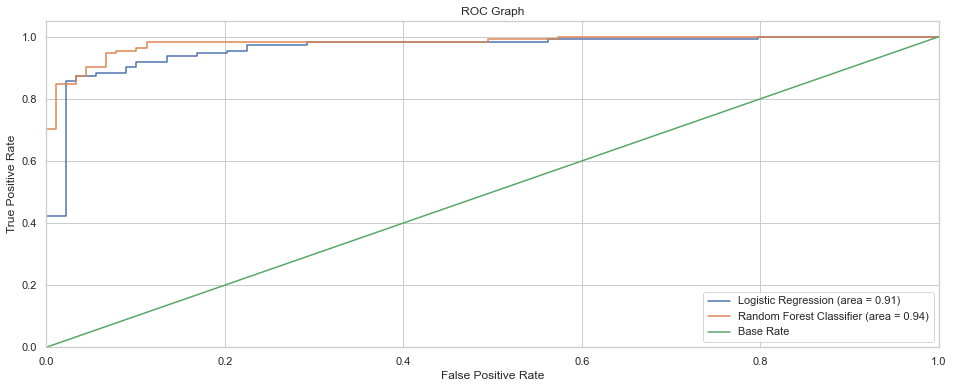

In [45]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_std)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test_std)[:,1])

fig = plt.figure(figsize = (16,6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()